In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import netCDF4

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/amssolar'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# Configs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from netCDF4 import Dataset
from os import listdir
# Lbraries to unzip compressed data folders
import tarfile
import zipfile
# some libraries for lat-long cartesian product
import itertools

In [ ]:
df_train_csv = pd.read_csv('/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/train.csv')
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Date    5113 non-null   int64
 1   ACME    5113 non-null   int64
 2   ADAX    5113 non-null   int64
 3   ALTU    5113 non-null   int64
 4   APAC    5113 non-null   int64
 5   ARNE    5113 non-null   int64
 6   BEAV    5113 non-null   int64
 7   BESS    5113 non-null   int64
 8   BIXB    5113 non-null   int64
 9   BLAC    5113 non-null   int64
 10  BOIS    5113 non-null   int64
 11  BOWL    5113 non-null   int64
 12  BREC    5113 non-null   int64
 13  BRIS    5113 non-null   int64
 14  BUFF    5113 non-null   int64
 15  BURB    5113 non-null   int64
 16  BURN    5113 non-null   int64
 17  BUTL    5113 non-null   int64
 18  BYAR    5113 non-null   int64
 19  CAMA    5113 non-null   int64
 20  CENT    5113 non-null   int64
 21  CHAN    5113 non-null   int64
 22  CHER    5113 non-null   int64
 23  CHEY    5113 

In [ ]:
#We have decided not to use the elevations of the mesonet station to keep our model simple
elevations_nc = Dataset('/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/gefs_elevations.nc')
print(repr(elevations_nc))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(16), lat(9)
    variables(dimensions): float32 elevation_control(lat, lon), float32 elevation_perturbation(lat, lon), float32 latitude(lat, lon), float32 longitude(lat, lon)
    groups: 


In [ ]:
for dim in elevations_nc.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 9


In [ ]:
for var in elevations_nc.variables.values():
    print(var)
    print("--"*50)

<class 'netCDF4._netCDF4.Variable'>
float32 elevation_control(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 elevation_perturbation(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(lat, lon)
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(lat, lon)
unlimited dimensions: 
current shape = (9, 16)
filling on, default _Fil

In [ ]:
print(elevations_nc['elevation_control'])
elevation_control = elevations_nc['elevation_control'][:]
type(elevation_control)

<class 'netCDF4._netCDF4.Variable'>
float32 elevation_control(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used


numpy.ma.core.MaskedArray

In [ ]:
elevation_perturbation = elevations_nc['elevation_perturbation'][:]
latitude = elevations_nc['latitude'][:]
longitude = elevations_nc['longitude'][:]

In [ ]:
variables = [elevation_control, elevation_perturbation,latitude,longitude]
for v in variables:
    print(v.shape)

(9, 16)
(9, 16)
(9, 16)
(9, 16)


In [ ]:
df_elevation_control = pd.DataFrame(elevation_control[:].data)
type(df_elevation_control)

pandas.core.frame.DataFrame

In [ ]:
df_elevation_perturbation = pd.DataFrame(elevation_perturbation[:].data)
df_latitude = pd.DataFrame(latitude[:].data)
df_longitude = pd.DataFrame(longitude[:].data)

In [ ]:
import tarfile

In [ ]:
file_train = tarfile.open('/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/gefs_train.tar.gz')
file_train.extractall('/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/working/tarzip')
file_train.close()

In [ ]:
nc_pwat_eatm_latlon = Dataset('/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/working/tarzip/train/pwat_eatm_latlon_subset_19940101_20071231.nc')
print(repr(nc_pwat_eatm_latlon))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    title: Subset of data from 2nd-generation multi-decadal ensemble reforecast generated from the NCEP Global Ensemble Forecast System, mimicking version operational at NCEP/EMC circa mid-2012.
    institution: NOAA Earth System Research Laboratory (ESRL)
    source: NCEP GFS v 9.01, T254L42.  Control initial conditions from CFSRR.  Perturbed initial conditions from ETR.  Model error simulated with STTP.
    references: http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
    history: Subset created 2013-01-15 19:18:02 UTC
    comment: Original dataset generated on DOE's supercomputers at Lawrence Berkeley Laboratory through ALCC/ASCR grant.
    dimensions(sizes): time(5113), lat(9), lon(16), ens(11), fhour(5)
    variables(dimensions): float64 time(time), int32 intTime(time), float32 lat(lat), float32 lon(lon), int16 ens(ens), int32 fhour(fhour), int32 intValidTime(t

In [ ]:
# To check dimension and number of variables present in each file
for dim in nc_pwat_eatm_latlon.dimensions.values():
    print(dim)

#variables
for var in nc_pwat_eatm_latlon.variables.values():
    print(var)
    print("--"*50)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 5113
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 9
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'ens', size = 11
<class 'netCDF4._netCDF4.Dimension'>: name = 'fhour', size = 5
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: hours since 1800-01-01 00:00:00
    axis: T
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
int32 intTime(time)
    long_name: time as an integer (YYYYMMDDHH)
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of -2147483647 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 la

In [ ]:
nc_time = nc_pwat_eatm_latlon['time'][:]
nc_time

masked_array(data=[1700568., 1700592., 1700616., ..., 1823208., 1823232.,
                   1823256.],
             mask=False,
       fill_value=1e+20)

In [ ]:
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['time'][:][:].data)
df_nc_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5113 non-null   float64
dtypes: float64(1)
memory usage: 40.1 KB


In [ ]:
df_nc_lat = pd.DataFrame(nc_pwat_eatm_latlon['lat'][:][:].data)
df_nc_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float32
dtypes: float32(1)
memory usage: 164.0 bytes


In [ ]:
df_nc_lat

,0
0,31.0
1,32.0
2,33.0
3,34.0
4,35.0
5,36.0
6,37.0
7,38.0
8,39.0


In [ ]:
df_nc_lon = pd.DataFrame(nc_pwat_eatm_latlon['lon'][:][:].data)
df_nc_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16 non-null     float32
dtypes: float32(1)
memory usage: 192.0 bytes


In [ ]:
df_nc_ens = pd.DataFrame(nc_pwat_eatm_latlon['ens'][:][:].data)
df_nc_ens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11 non-null     int16
dtypes: int16(1)
memory usage: 150.0 bytes


In [ ]:
df_nc_ens
df_nc_fhour = pd.DataFrame(nc_pwat_eatm_latlon['fhour'][:][:].data)
df_nc_fhour.info()
df_nc_fhour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5 non-null      int32
dtypes: int32(1)
memory usage: 148.0 bytes


,0
0,12
1,15
2,18
3,21
4,24


In [ ]:
# Precipitable_water
nc_prcp = list(nc_pwat_eatm_latlon.variables.values())[-1]
#nc_prcp = nc_pwat_eatm_latlon['Precipitable_water'][:]
print("Index 2 refers to the hours: ")
print("Values for: \n -the first day, \n -first ensemble model, \n -first latitude, \n -first longitude, \n -and hours, 12-15-18-21-24 ")
print("=="*50, "\n")
print(nc_prcp[0,0,0,0,0], nc_prcp[0,0,1,0,0], nc_prcp[0,0,2,0,0], nc_prcp[0,0,3,0,0], nc_prcp[0,0,4,0,0])
print("=="*50, "\n")
print("Average value we should expect to get if we take mean of ")
print(sum([nc_prcp[0,0,0,0,0], nc_prcp[0,0,1,0,0], nc_prcp[0,0,2,0,0], nc_prcp[0,0,3,0,0], nc_prcp[0,0,4,0,0]])/5)
nc_4dim = np.mean(nc_prcp, axis=2)
nc_4dim[0,0,0,0]

Index 2 refers to the hours: 
Values for: 
 -the first day, 
 -first ensemble model, 
 -first latitude, 
 -first longitude, 
 -and hours, 12-15-18-21-24 

5.7 5.6 6.1 6.4 6.7

Average value we should expect to get if we take mean of 
6.099999904632568


6.1

In [ ]:
nc_4dim.shape

(5113, 11, 9, 16)

In [ ]:
# some libraries for lat-long cartesian product
import itertools

In [ ]:
nc_pwat_eatm_latlon['lat'][:][:].data[2:6]
nc_pwat_eatm_latlon['lon'][:][:].data[3:12]
latlon = list(itertools.product(nc_pwat_eatm_latlon['lat'][:][:].data[2:6], nc_pwat_eatm_latlon['lon'][:][:].data[3:12]))
latlon

[(33.0, 257.0),
 (33.0, 258.0),
 (33.0, 259.0),
 (33.0, 260.0),
 (33.0, 261.0),
 (33.0, 262.0),
 (33.0, 263.0),
 (33.0, 264.0),
 (33.0, 265.0),
 (34.0, 257.0),
 (34.0, 258.0),
 (34.0, 259.0),
 (34.0, 260.0),
 (34.0, 261.0),
 (34.0, 262.0),
 (34.0, 263.0),
 (34.0, 264.0),
 (34.0, 265.0),
 (35.0, 257.0),
 (35.0, 258.0),
 (35.0, 259.0),
 (35.0, 260.0),
 (35.0, 261.0),
 (35.0, 262.0),
 (35.0, 263.0),
 (35.0, 264.0),
 (35.0, 265.0),
 (36.0, 257.0),
 (36.0, 258.0),
 (36.0, 259.0),
 (36.0, 260.0),
 (36.0, 261.0),
 (36.0, 262.0),
 (36.0, 263.0),
 (36.0, 264.0),
 (36.0, 265.0)]

In [ ]:
len(latlon)
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['intValidTime'][:][:].data)
df_nc_time[0].apply(lambda x: int(str(x)[:8])).head()
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
date_latlon[0]
len(date_latlon)
5113*36
latlon = list(itertools.product(nc_pwat_eatm_latlon['lat'][:][:].data[2:6], nc_pwat_eatm_latlon['lon'][:][:].data[3:12]))
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['intValidTime'][:][:].data)
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
df_gefs = pd.DataFrame(date_latlon, columns=['date','coordinates'])
df_gefs.shape
#df_gefs.rename({0:"date",1:"coordinates"}, axis=1, inplace=True)
df_gefs.head()

,date,coordinates
0,19940101,"(33.0, 257.0)"
1,19940101,"(33.0, 258.0)"
2,19940101,"(33.0, 259.0)"
3,19940101,"(33.0, 260.0)"
4,19940101,"(33.0, 261.0)"


In [ ]:
nc_4dim.shape

nc_4dim_cropped = nc_4dim[:,:,2:6,3:12]

nc_4dim_cropped.shape

5113*4*9

# x =  nc_4dim_cropped.reshape(5113*4*9,11)
y = pd.DataFrame(nc_4dim_cropped.reshape(5113*4*9,11))
print(y.shape)
y.head()

(184068, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,5.760000,6.260000,6.800000,7.180000,7.300000,7.660000,8.980000,10.920000,12.960001,6.140000,6.320000
1,6.960000,7.780000,7.780000,7.660000,8.120000,9.340000,10.740000,6.340000,6.580000,7.159999,7.700000
2,7.940000,8.100000,8.100000,8.500000,9.240000,6.300000,6.660000,7.020000,7.460000,8.339999,9.040001
3,8.960001,9.039999,9.100000,5.810383,6.250383,6.630383,7.110383,7.310383,7.690382,9.010382,10.990383
4,13.090384,6.110383,6.330382,6.970383,7.890382,7.970383,7.830383,8.290382,9.590383,11.050383,6.250383


In [ ]:
nc_4dim_cropped.reshape(5113*4*9,11)

masked_array(
  data=[[ 5.76     ,  6.26     ,  6.8      , ..., 12.960001 ,  6.14     ,
          6.3199997],
        [ 6.96     ,  7.78     ,  7.78     , ...,  6.5800004,  7.159999 ,
          7.7      ],
        [ 7.94     ,  8.1      ,  8.1      , ...,  7.46     ,  8.339999 ,
          9.040001 ],
        ...,
        [ 4.6818166,  5.041816 ,  5.5018167, ...,  3.8218162,  4.121816 ,
          4.621816 ],
        [ 5.1418166,  5.6418166,  6.1618166, ...,  4.301816 ,  4.7218165,
          5.1818166],
        [ 5.881817 ,  6.561816 ,  4.2018166, ...,  5.2018166,  5.9618163,
          6.7018166]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

Building Data Pre-Processing Process¶
File extraction for GEFS variables
Reshaping & aggregating dimensions
Cropping based on given coordinates
Calculate haversine distance between mesonets & GEFS
Mapping mesonets to closest GEFS points

In [ ]:
# Building Data PreProcessing Process
from os import listdir

In [ ]:
def unzip_gefs(directory:str, dest_path:str='tarzip')->str:
    file_train = tarfile.open(directory)
    file_train.extractall(f'/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/working{dest_path}')
    file_train.close()
    return "Unzipped files!"

In [ ]:
unzip_gefs(directory='/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/gefs_train.tar.gz')

'Unzipped files!'

In [ ]:
def pre_processing(data_dir='/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/working/tarzip/train', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12):
    # Looping through files holding GEFS data
    for n,f in enumerate(listdir(f'{data_dir}')):
        #print(n,f)
        # Reading data
        nc_ = Dataset(f'{data_dir}{f}')

        # extracting GEFS variable from netcdf
        nc_gefs = list(nc_.variables.values())[-1]

        if agg_dims == 'hours':
            # taking mean of the measurements taken in different times
            #print(f"shape before processing {nc_gefs.shape}")
            nc_agg = np.mean(nc_gefs, axis=2)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)

        elif agg_dims == 'ens_models':
            # taking mean of the measurements taken in different times
            #print(f"shape before processing {nc_gefs.shape}")
            nc_agg = np.mean(nc_gefs, axis=1)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)

        else:
            # taking mean of the measurements taken in different times
            nc_agg = np.mean(nc_gefs, axis=2)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)
            nc_agg = np.mean(nc_agg, axis=1)
            #print("shape after taking mean of ensembles:")
            #print(nc_agg.shape)

        #print("=="*50)
        #print("AGGREGATING DONE!")
        #print("STARTING CROPPING...")

        # cropping GEFS based on lat-lon
        if agg_dims == 'hours':
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:,:,crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end]
            #print(f"shape after crop {nc_agg_cropped.shape}")
        elif agg_dims == 'ens_models':
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:,:, crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end]
            #print(f"shape after crop {nc_agg_cropped.shape}")
        else:
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:, crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end]
            #print(f"shape after crop {nc_agg_cropped.shape}")

        #print("=="*50)
        #print("CROPPING DONE!")
        #print("STARTING RESHAPING...")

        # reshaping into 2 dimensions & converting to dataframe
        if agg_dims == 'hours':
            #print("we gotta form the shape dynamically too, rather than just giving the numbers")
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape),1)) #5113*4*9*11
        elif agg_dims == 'ens_models':
            #print(nc_agg_cropped.shape)
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape)//5,5)) #5113*4*9
        else:
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape),1)) #5113*4*9

        #print("=="*50)
        #print("RESHAPING DONE!")
        #print("STARTING RENAMING...")

        # we will use the name of file to rename columns so we don't get confused as we keep appending files
        prefix = f.split("latlon")[0]

        # existing columns of dataframe we created
        cols = list(df_gefs_.columns)

        # creating new names for columns
        newcols = [prefix+str(c) for c in cols]

        # creating the dictionary to rename cols accordingly
        rename_cols = {cols[i]: newcols[i] for i in range(len(cols))}

        # changing names on the dataset & inplacing
        df_gefs_ = df_gefs_.rename(rename_cols, axis=1)

        if n == 0:
            latlon = list(itertools.product(nc_['lat'][:][:].data[crop_gefs_x_start:crop_gefs_x_end], nc_['lon'][:][:].data[crop_gefs_y_start:crop_gefs_y_end]))
            df_nc_time = pd.DataFrame(nc_['intValidTime'][:][:].data)
            date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
            df_gefs = pd.DataFrame(date_latlon, columns=['date','coordinates'])
            df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
            #df_ens = df_ens_[:] # ======> created to do some feature eng on GEFS variables later
        else:
            df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
            # printing shape to see if data is appended or duplicated
        #print(df_gefs.shape)
    return df_gefs

In [ ]:
! pip install haversine

In [ ]:
# needed for min distance calculations
from haversine import haversine
def custom_haversine(coord1, coordDf):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    source: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    l={}
    for coord2, n_coord2 in list(zip(coordDf.coord, coordDf.normalized_coord)):
        l[coord2] = haversine(coord1,n_coord2)
    return l

In [ ]:
def get_min_distance_node(df_gefs):
    """
    Normalizes the coordinates of GEFS points (they are greater than 180)
    Reads MES station info which includes MES coordinates
    Calculates haversine distance between a mesonet and all GEFS points, puts it into a dict and adds it to station info
    Then calculates minimum distance & adds coordinate of the related GEFS as another column,
    which will be used in join condition later when training set and labels are combined
    """
    # Get normalized GEFS coordinates
    df_gefs_loc = pd.DataFrame(df_gefs['coordinates'].unique(), columns=['coord'])
    df_gefs_loc['normalized_coord'] = df_gefs_loc['coord'].apply( lambda x: (x[0], x[1]-360))
    # Read mesonet metadata
    df_mes = pd.read_csv("/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/station_info.csv")
    # zip coordinates for later calculations
    df_mes["coord"] = list(zip(df_mes.nlat, df_mes.elon))
    # calculate haversine distances between the area we cropped and mesonets
    df_mes['new_distances'] = df_mes['coord'].apply(lambda x: custom_haversine(x, df_gefs_loc))
    # Find minimum distance GEFS for every mesonet
    df_mes['min_dist_node'] = df_mes['new_distances'].apply(lambda x: list(x.keys())[list(x.values()).index(min(x.values()))])
    return df_mes

In [ ]:
def get_one_ens(df_gefs, ens_model=0):
    """
    can be used when no aggregations are made on ensemble models and we want to select a subset of models.
    """
    # taking only one ensemble model = number 0
    #ens = ['date', 'coordinates']
    ens = [col for col in df_gefs.columns if col.split("_")[-1]==f"{ens_model}" ]
    ens.insert(0,'date')
    ens.insert(1,'coordinates')
    # crop df_gefs based on the ens model we wanna get
    df_gefs_ens = df_gefs[ens]
    return df_gefs_ens

In [ ]:
def combine_ens_gefs(df_mes, df_train_csv):
    """
    Joins labels (daily solar power production) with related GEFS point (closest GEFS in grid)
    """
    # create mesonet list
    mesonets = list(df_mes['stid'])
    # melt training dataframe so mesonets are in rows instead of columns
    df_train = pd.melt(df_train_csv, id_vars='Date', value_vars=mesonets,\
                 var_name='stid', value_name='Daily_Production')
    # combine distance related features from metadata to training data
    df_train = pd.merge(df_train, df_mes[['stid','new_distances','min_dist_node']], on='stid', how='left')
    # create join columns
    df_train['join'] = df_train['Date'].astype(str) + df_train['min_dist_node'].astype(str)
    df_gefs_ens['join'] = df_gefs_ens['date'].astype(str) + df_gefs_ens['coordinates'].astype(str)
    # join two dataframes
    df_train_merged = pd.merge(df_train, df_gefs_ens[['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0','tmp_sfc_0', 'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0','pwat_eatm_0', 'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0','apcp_sfc_0', 'pres_msl_0', 'join']], how='left', on='join')
    return df_train_merged

In [ ]:
# pipeline
df_gefs = pre_processing(data_dir='/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
df_mes = get_min_distance_node(df_gefs)
df_gefs_ens = get_one_ens(df_gefs)
df_train_csv = pd.read_csv('/content/drive/MyDrive/ams solar/ams-2014-solar-energy-prediction-contest/train.csv')
df_train_merged = combine_ens_gefs(df_mes, df_train_csv)

In [ ]:
df_train_merged.head()

,Date,stid,Daily_Production,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,19940101,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.383804,258.641876,282.548553,0.001273,219.090912,284.397064,280.260590,8.086300,47.745449,0.003322,364.319794,282.354309,0.000000,102023.781250
1,19940102,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.387222,279.489655,282.332153,0.069091,166.909088,283.792664,279.787262,11.476501,32.618183,0.003798,358.075287,282.072540,0.031273,101307.500000
2,19940103,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.279846,227.046585,277.426300,0.000909,225.327286,277.425568,273.055878,6.755241,49.072731,0.002511,335.168427,275.724640,0.000000,101984.921875
3,19940104,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.669937,238.266357,277.474640,0.002727,226.218170,278.947357,275.171509,5.734901,49.527271,0.002601,342.495178,276.330933,0.000909,102571.125000
4,19940105,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.216904,258.618134,282.668030,0.024364,219.454544,283.422028,278.554901,9.284234,46.636364,0.003136,353.977081,282.822815,0.000000,100769.320312


In [ ]:
def check_multicollinearity(data:pd.DataFrame, is_gefs:bool)->pd.DataFrame:
    """
    Function to take a pandas dataframe and calculate VIF for multicollinearity
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    data = sm.add_constant(data)

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns

    if is_gefs==True:
        desc_dict = {
                    'tcolc_eatm_0': 'Total_Column-Integrated_Condensate',
                     'ulwrf_tatm_0': 'Upward_Long-Wave_Rad_Flux',
                     'dlwrf_sfc_0': 'Downward_Long-Wave_Rad_Flux',
                     'tmp_sfc_0': 'Temperature_surface',
                     'tcdc_eatm_0': 'Total_cloud_cover',
                     'dswrf_sfc_0': 'Downward_Short-Wave_Rad_Flux',
                     'tmax_2m_0': 'Maximum_temperature',
                     'tmin_2m_0': 'Minimum_temperature',
                     'pwat_eatm_0': 'Precipitable_water',
                     'uswrf_sfc_0': 'Upward_Short-Wave_Rad_Flux',
                     'spfh_2m_0': 'Specific_humidity_height_above_ground',
                     'ulwrf_sfc_0': 'Upward_Long-Wave_Rad_Flux_surface',
                     'tmp_2m_0': 'Temperature_height_above_ground',
                     'apcp_sfc_0': 'Total_precipitation',
                     'pres_msl_0': 'Pressure'}
        vif_data["desc"] = vif_data['feature'].map(desc_dict)

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

In [ ]:
# PCA
def principal_comp_analysis(data:pd.DataFrame, plot_exp_var:bool, n_comp:int=10)->pd.DataFrame:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np

    # Since it is a variance minimizing exercise, we normalize our data before performing PCA on that.
    # use minMax scaler
    min_max_scaler = MinMaxScaler()
    data_n = min_max_scaler.fit_transform(data)

    if plot_exp_var==True:
        import matplotlib.pyplot as plt

        pca = PCA()
        pca.fit(data_n)
        print("Explained variance from all features: ")
        print(pca.explained_variance_)
        # how to pick n_components for PCA
        plt.plot(np.cumsum(pca.explained_variance_ratio_))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.show()

    pca_res = PCA(n_components=n_comp)
    pcomp = pca_res.fit_transform(data_n)

    pca_df = pd.DataFrame(data = pcomp
                 , columns = [f'principal_component_{i}' for i in range(1,11)])

    return pca_df

In [ ]:
df_train_merged.columns

Index(['Date', 'stid', 'Daily_Production', 'new_distances', 'min_dist_node',
       'join', 'tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0',
       'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0',
       'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0',
       'pres_msl_0'],
      dtype='object')

In [ ]:
df_train_merged = df_train_merged.rename(columns={'Daily_Production': 'Daily Solar Energy'})

In [ ]:
data = df_train_merged.copy()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

In [ ]:
data.head()

,Date,stid,Daily Solar Energy,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,1994-01-01,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.383804,258.641876,282.548553,0.001273,219.090912,284.397064,280.260590,8.086300,47.745449,0.003322,364.319794,282.354309,0.000000,102023.781250
1,1994-01-02,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.387222,279.489655,282.332153,0.069091,166.909088,283.792664,279.787262,11.476501,32.618183,0.003798,358.075287,282.072540,0.031273,101307.500000
2,1994-01-03,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.279846,227.046585,277.426300,0.000909,225.327286,277.425568,273.055878,6.755241,49.072731,0.002511,335.168427,275.724640,0.000000,101984.921875
3,1994-01-04,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.669937,238.266357,277.474640,0.002727,226.218170,278.947357,275.171509,5.734901,49.527271,0.002601,342.495178,276.330933,0.000909,102571.125000
4,1994-01-05,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.216904,258.618134,282.668030,0.024364,219.454544,283.422028,278.554901,9.284234,46.636364,0.003136,353.977081,282.822815,0.000000,100769.320312


In [ ]:
## Working on KENT Station
station_id = 'KENT'
station_data = data[data['stid'] == station_id]

In [ ]:
station_data['Date'] = pd.to_datetime(station_data['Date'], format='%Y%m%d')

<ipython-input-54-057fc7ac9f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Date'] = pd.to_datetime(station_data['Date'], format='%Y%m%d')


In [ ]:
station_data.head()

,Date,stid,Daily Solar Energy,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
235198,1994-01-01,KENT,11189400,"{(33.0, 257.0): 425.95167414880603, (33.0, 258...","(36.0, 257.0)","19940101(36.0, 257.0)",0.007535,238.547455,230.896423,278.059418,0.006545,214.909088,279.564331,274.855286,6.331754,57.581821,0.002144,338.501587,277.722321,0.0,101978.156250
235199,1994-01-02,KENT,11624400,"{(33.0, 257.0): 425.95167414880603, (33.0, 258...","(36.0, 257.0)","19940102(36.0, 257.0)",0.001007,250.696350,232.907852,280.041260,0.000545,224.000000,281.227264,278.967285,3.812866,60.763638,0.001589,351.057129,280.075134,0.0,101843.367188
235200,1994-01-03,KENT,12391500,"{(33.0, 257.0): 425.95167414880603, (33.0, 258...","(36.0, 257.0)","19940103(36.0, 257.0)",0.000985,244.188919,232.210220,278.726288,0.000182,218.036362,280.364288,274.882996,6.582514,58.763634,0.002023,340.513855,278.587921,0.0,101625.179688
235201,1994-01-04,KENT,12091500,"{(33.0, 257.0): 425.95167414880603, (33.0, 258...","(36.0, 257.0)","19940104(36.0, 257.0)",0.002702,242.542664,231.011826,278.201935,0.002545,217.890915,278.234589,274.373322,7.633083,58.018185,0.002352,339.440643,276.655487,0.0,102581.445312
235202,1994-01-05,KENT,9648000,"{(33.0, 257.0): 425.95167414880603, (33.0, 258...","(36.0, 257.0)","19940105(36.0, 257.0)",0.050782,206.562347,270.981781,284.757141,0.050000,207.272720,287.036591,282.746704,6.020598,52.890907,0.001820,371.686127,285.570831,0.0,100397.226562


In [ ]:
data.head()

,Date,stid,Daily Solar Energy,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,1994-01-01,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.383804,258.641876,282.548553,0.001273,219.090912,284.397064,280.260590,8.086300,47.745449,0.003322,364.319794,282.354309,0.000000,102023.781250
1,1994-01-02,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.387222,279.489655,282.332153,0.069091,166.909088,283.792664,279.787262,11.476501,32.618183,0.003798,358.075287,282.072540,0.031273,101307.500000
2,1994-01-03,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.279846,227.046585,277.426300,0.000909,225.327286,277.425568,273.055878,6.755241,49.072731,0.002511,335.168427,275.724640,0.000000,101984.921875
3,1994-01-04,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.669937,238.266357,277.474640,0.002727,226.218170,278.947357,275.171509,5.734901,49.527271,0.002601,342.495178,276.330933,0.000909,102571.125000
4,1994-01-05,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.216904,258.618134,282.668030,0.024364,219.454544,283.422028,278.554901,9.284234,46.636364,0.003136,353.977081,282.822815,0.000000,100769.320312


In [ ]:
station_data = station_data.drop(columns=['new_distances', 'min_dist_node' , 'join'])

In [ ]:
## Adding new features on the data related to timeseries
station_data['Date'] = pd.to_datetime(station_data['Date'], format='%Y%m%d')
station_data['DayOfYear'] = station_data['Date'].dt.dayofyear
station_data['Month'] = station_data['Date'].dt.month
station_data['Weekday'] = station_data['Date'].dt.weekday

In [ ]:
station_data.head()

,Date,stid,Daily Solar Energy,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0,DayOfYear,Month,Weekday
235198,1994-01-01,KENT,11189400,0.007535,238.547455,230.896423,278.059418,0.006545,214.909088,279.564331,274.855286,6.331754,57.581821,0.002144,338.501587,277.722321,0.0,101978.156250,1,1,5
235199,1994-01-02,KENT,11624400,0.001007,250.696350,232.907852,280.041260,0.000545,224.000000,281.227264,278.967285,3.812866,60.763638,0.001589,351.057129,280.075134,0.0,101843.367188,2,1,6
235200,1994-01-03,KENT,12391500,0.000985,244.188919,232.210220,278.726288,0.000182,218.036362,280.364288,274.882996,6.582514,58.763634,0.002023,340.513855,278.587921,0.0,101625.179688,3,1,0
235201,1994-01-04,KENT,12091500,0.002702,242.542664,231.011826,278.201935,0.002545,217.890915,278.234589,274.373322,7.633083,58.018185,0.002352,339.440643,276.655487,0.0,102581.445312,4,1,1
235202,1994-01-05,KENT,9648000,0.050782,206.562347,270.981781,284.757141,0.050000,207.272720,287.036591,282.746704,6.020598,52.890907,0.001820,371.686127,285.570831,0.0,100397.226562,5,1,2


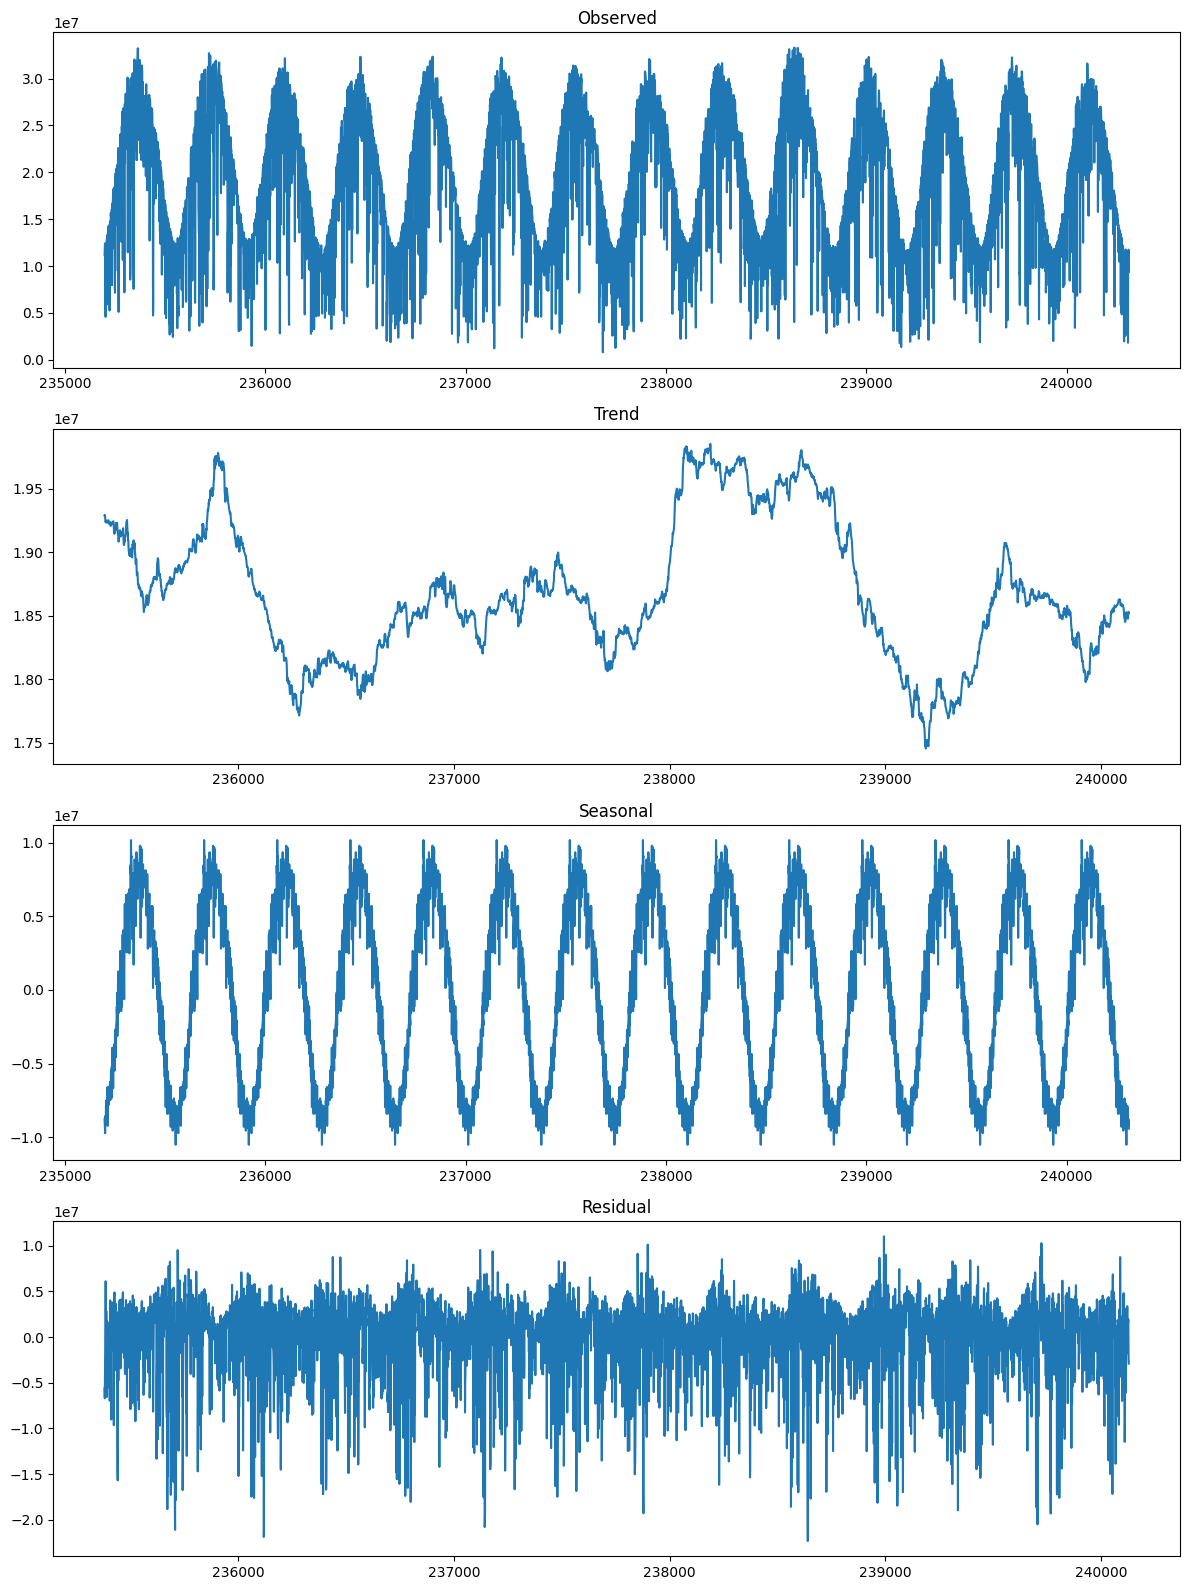

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(station_data['Daily Solar Energy'], model='additive', period=365)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()

In [ ]:
# Separate features, target, and date
target_col = 'Daily Solar Energy'
feature_cols = [col for col in station_data.columns if col not in ['Date', target_col, 'new_distances', 'min_dist_node', 'joint','stid']]
X = station_data[feature_cols]
y = station_data[target_col]
dates = station_data['Date']


In [ ]:
print(feature_cols)

['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0', 'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0', 'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0', 'pres_msl_0', 'DayOfYear', 'Month', 'Weekday']


Text(0.5, 1.0, 'Correlation Heatmap of Weather Variables and Solar Energy')

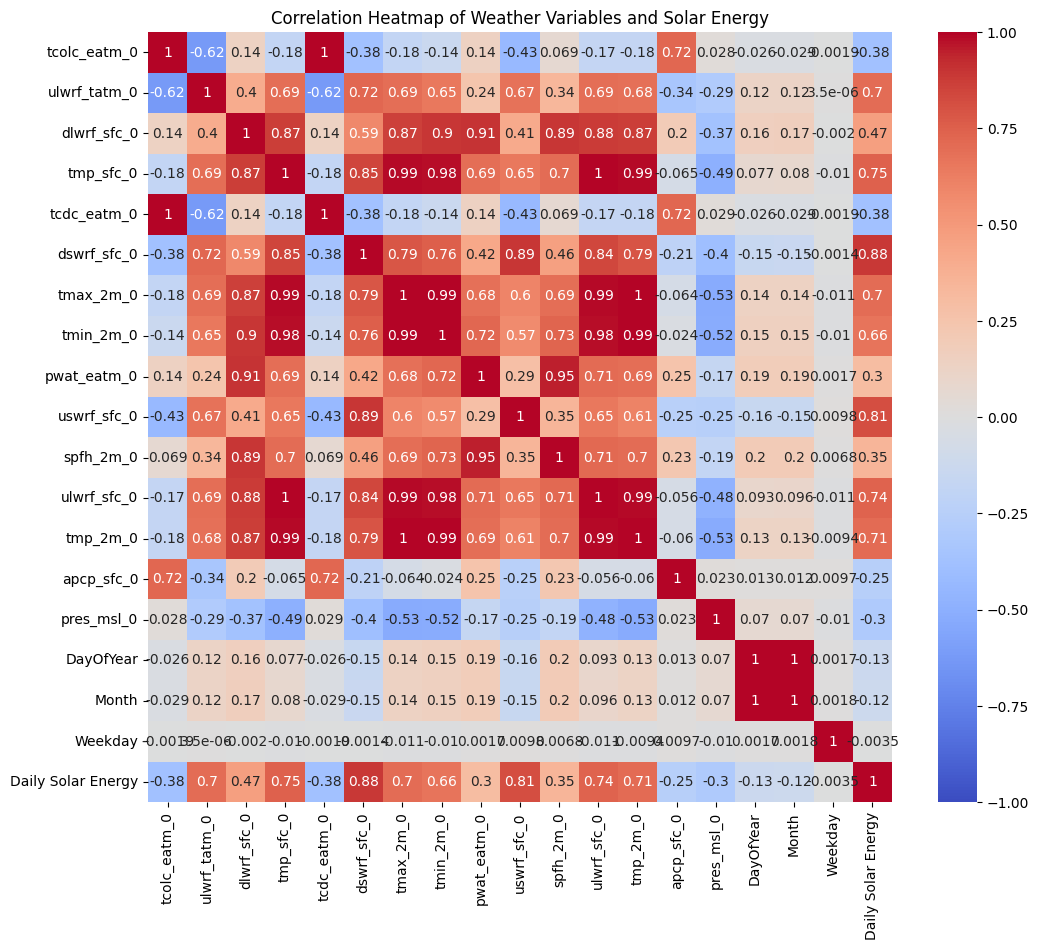

In [ ]:
corr = station_data[feature_cols + ['Daily Solar Energy']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Weather Variables and Solar Energy')

In [ ]:
feature_cols_prev = feature_cols.copy()

In [ ]:
feature_cols_prev = ['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'dswrf_sfc_0',
       'apcp_sfc_0', 'pres_msl_0', 'DayOfYear', 'Weekday']

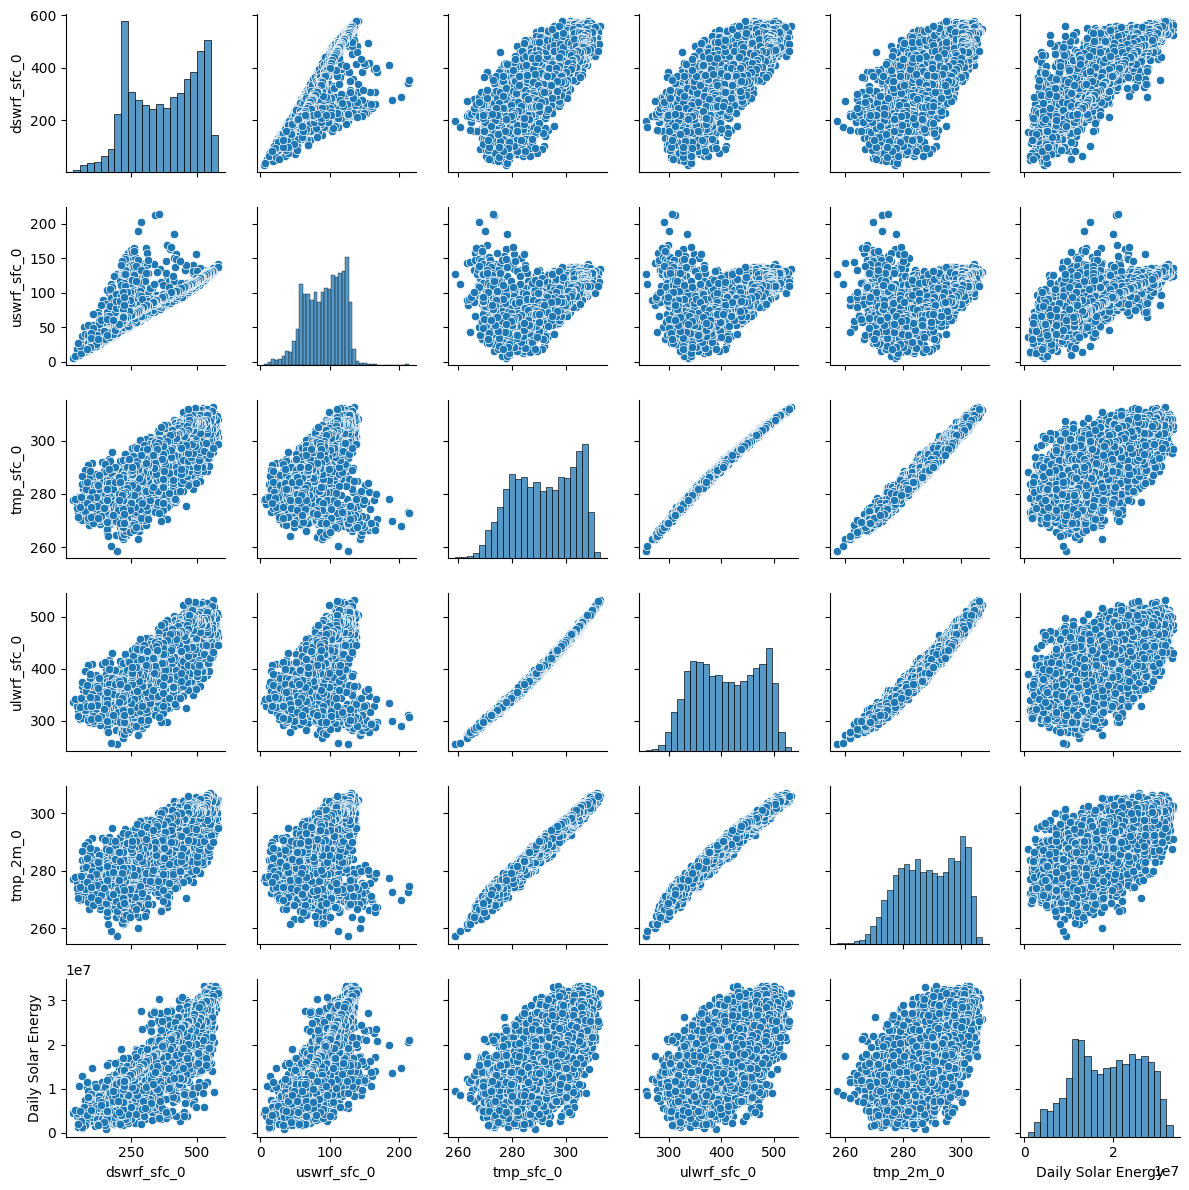

In [ ]:
top_features = corr['Daily Solar Energy'].sort_values(ascending=False)[1:6].index
sns.pairplot(station_data[list(top_features) + ['Daily Solar Energy']], height=2)
plt.tight_layout()

Text(0, 0.5, 'Average Daily Solar Energy')

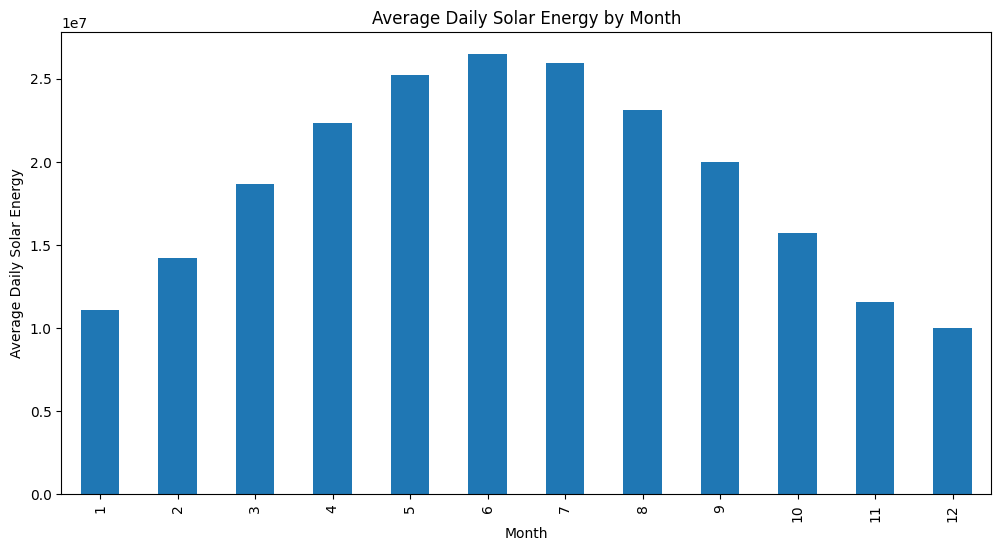

In [ ]:
station_data['Month'] = station_data['Date'].dt.month
monthly_avg = station_data.groupby('Month')['Daily Solar Energy'].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Daily Solar Energy by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Solar Energy')

Text(0.5, 1.0, 'Lag Plot of Daily Solar Energy')

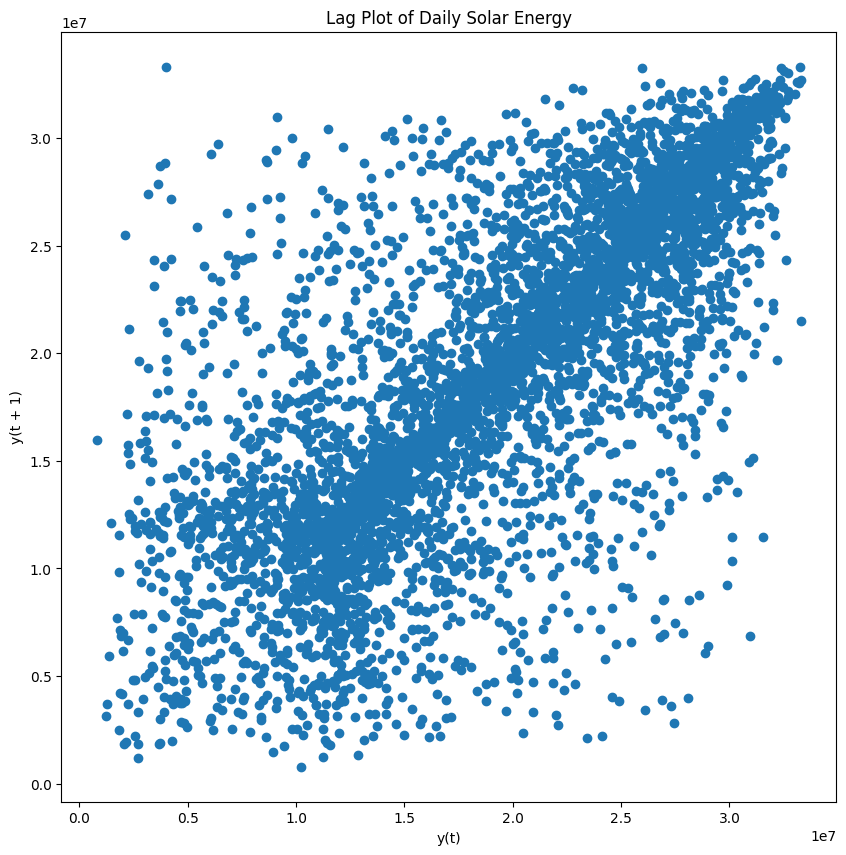

In [ ]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 10))
lag_plot(station_data['Daily Solar Energy'], lag=1)
plt.title('Lag Plot of Daily Solar Energy')

Text(0.5, 0, 'Daily Solar Energy')

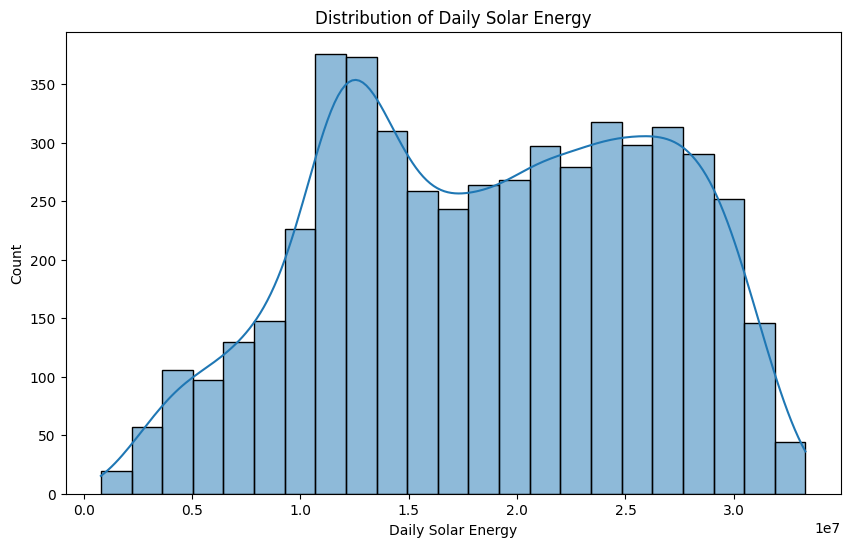

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(station_data['Daily Solar Energy'], kde=True)
plt.title('Distribution of Daily Solar Energy')
plt.xlabel('Daily Solar Energy')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_new = station_data[feature_cols_prev]

In [ ]:
# Apply PCA to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [ ]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Create a new dataframe with PCA components and date
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_cols)
df_pca['Date'] = dates.values
df_pca[target_col] = y.values


In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Date,Daily Solar Energy
0,1.300514,-1.616970,1.515129,0.998496,-0.245518,0.211828,1994-01-01,11189400
1,0.975755,-1.546752,1.505757,1.501490,-0.195916,0.388293,1994-01-02,11624400
2,1.023739,-1.488285,1.567492,-1.490074,0.184251,0.391852,1994-01-03,12391500
3,1.429550,-1.932757,1.255951,-1.014436,-0.912762,0.201176,1994-01-04,12091500
4,1.210834,-0.227265,2.002957,-0.477501,1.645376,-0.438187,1994-01-05,9648000


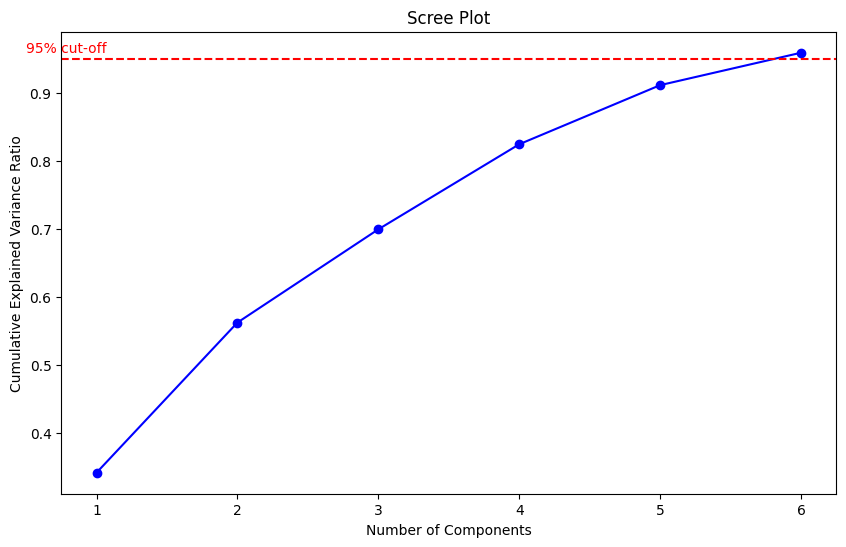

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.96, '95% cut-off', color='red')
plt.show()

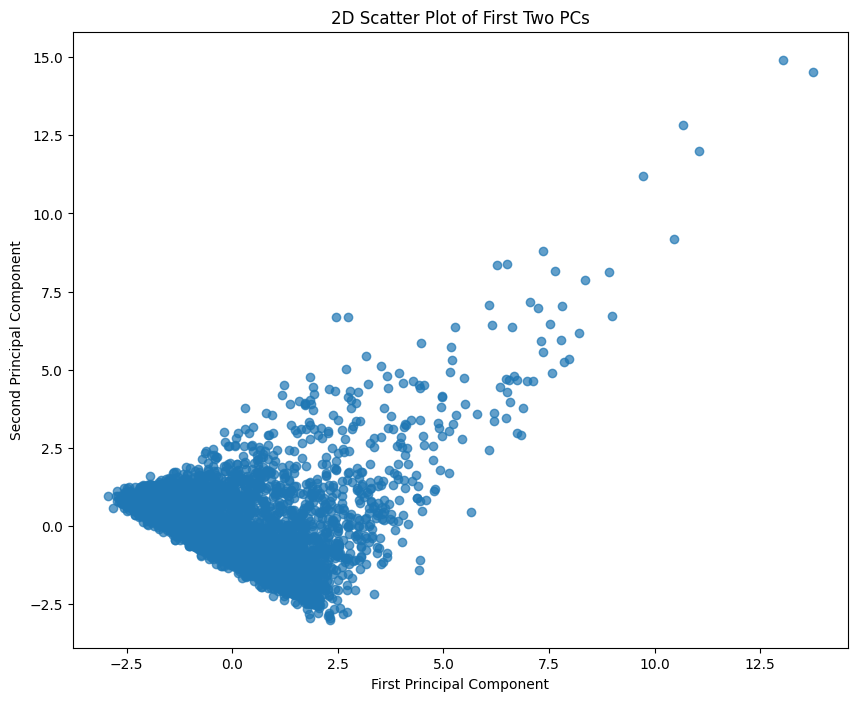

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Scatter Plot of First Two PCs')
plt.show()

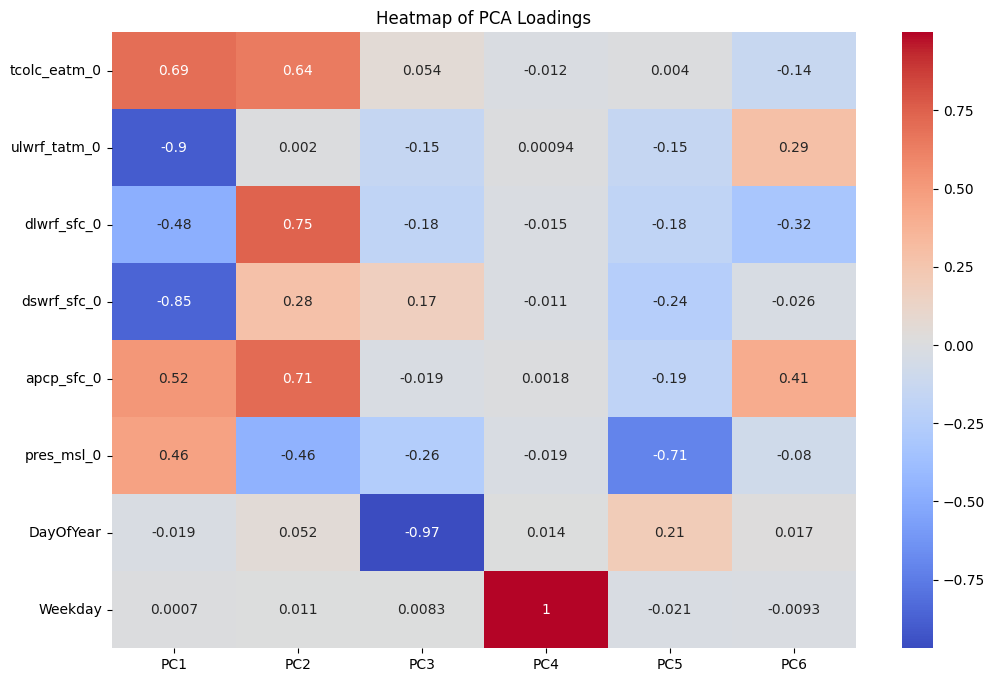

In [ ]:
import seaborn as sns

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(loadings.shape[1])],
            yticklabels=feature_cols_prev)
plt.title('Heatmap of PCA Loadings')
plt.show()

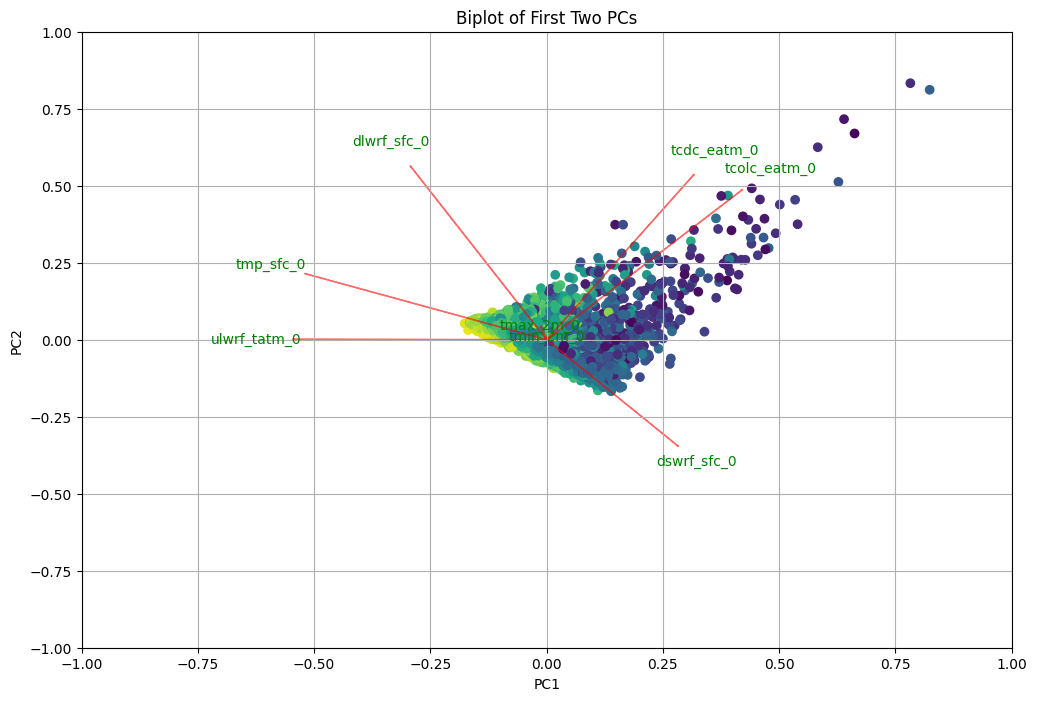

In [ ]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(12,8))
biplot(X_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=feature_cols)
plt.title("Biplot of First Two PCs")
plt.show()

In [ ]:
# Create sequences for CNN
def create_sequences(df, target_col, sequence_length):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i+sequence_length].drop(columns=['Date', target_col]).values)
        y.append(df.iloc[i+sequence_length][target_col])
    return np.array(X), np.array(y)

In [ ]:
sequence_length = 15  # for a 15 days of data


In [ ]:
df_pca_normalized = df_pca.copy()
features = df_pca_normalized.drop(columns=['Date', target_col]).values
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
df_pca_normalized.loc[:, df_pca_normalized.columns != 'Date'] = np.hstack((features_normalized, df_pca[target_col].values.reshape(-1, 1)))

In [ ]:
print(target_col)

Daily Solar Energy


In [ ]:

# Assuming df_pca_normalized is your DataFrame
solar_features = df_pca_normalized.columns.tolist()

# Drop 'Daily Solar Energy'
solar_features.remove('Daily Solar Energy')

print(solar_features)


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Date']


In [ ]:
df_pca_normalized.head()


,PC1,PC2,PC3,PC4,PC5,PC6,Date,Daily Solar Energy
0,0.786145,-1.216940,1.446954,0.998348,-0.294505,0.343036,1994-01-01,11189400
1,0.589832,-1.164094,1.438003,1.501268,-0.235005,0.628804,1994-01-02,11624400
2,0.618837,-1.120092,1.496961,-1.489854,0.221013,0.634567,1994-01-03,12391500
3,0.864146,-1.454604,1.199438,-1.014287,-1.094878,0.325786,1994-01-04,12091500
4,0.731934,-0.171041,1.912832,-0.477430,1.973664,-0.709602,1994-01-05,9648000


In [1]:
df_pca_normalized.shape

NameError: name 'df_pca_normalized' is not defined

In [ ]:
df_pca_normalized.isnull().sum()

PC1                   0
PC2                   0
PC3                   0
PC4                   0
PC5                   0
PC6                   0
Date                  0
Daily Solar Energy    0
dtype: int64

In [ ]:
# Create sequences
X_seq, y_seq = create_sequences(df_pca_normalized, target_col, sequence_length)


In [ ]:
# Train Test Split
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

In [ ]:
print(X_train.shape)

(4078, 15, 6)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Define and compile the CNN model
n_features = X_train.shape[2]
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, n_features), kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

In [ ]:
# Compile the model with MAE loss
opt = Adam(learning_rate=1e-4, clipvalue=1.0)
model.compile(optimizer=opt, loss='mae')

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 64)            1216      
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 128)            24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 128)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               6

In [ ]:
# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/300
102/102 [==============================] - 3s 10ms/step - loss: 18825474.0000 - val_loss: 18156710.0000 - lr: 1.0000e-04
Epoch 2/300
102/102 [==============================] - 1s 7ms/step - loss: 18824708.0000 - val_loss: 18154460.0000 - lr: 1.0000e-04
Epoch 3/300
102/102 [==============================] - 1s 7ms/step - loss: 18819720.0000 - val_loss: 18145508.0000 - lr: 1.0000e-04
Epoch 4/300
102/102 [==============================] - 1s 10ms/step - loss: 18805558.0000 - val_loss: 18123800.0000 - lr: 1.0000e-04
Epoch 5/300
102/102 [==============================] - 1s 13ms/step - loss: 18774896.0000 - val_loss: 18079686.0000 - lr: 1.0000e-04
Epoch 6/300
102/102 [==============================] - 1s 12ms/step - loss: 18715968.0000 - val_loss: 17999112.0000 - lr: 1.0000e-04
Epoch 7/300
102/102 [==============================] - 1s 13ms/step - loss: 18613394.0000 - val_loss: 17862958.0000 - lr: 1.0000e-04
Epoch 8/300
102/102 [==============================] - 1s 10ms/step - l

In [ ]:
print(X_test)

[[[ 0.06947946 -0.69771007  1.17628294 -0.49338927  0.1222655
    0.6826993 ]
  [ 1.04616277 -0.0216903   1.29282346 -0.01580323  0.45034474
   -1.30011743]
  [ 0.00532097 -0.68454415  1.06661585  0.49798075 -0.2431003
    0.48669315]
  ...
  [ 2.74821165  1.94774053  0.93497314 -1.53979388 -0.55752153
    0.46739929]
  [ 3.96070873  3.52225196  1.10499204 -1.07989125 -1.39122356
    0.72142722]
  [ 0.31666253 -1.15544344  1.11445509 -0.50235245 -0.57935852
    0.68612728]]

 [[ 1.04616277 -0.0216903   1.29282346 -0.01580323  0.45034474
   -1.30011743]
  [ 0.00532097 -0.68454415  1.06661585  0.49798075 -0.2431003
    0.48669315]
  [ 0.89543752 -0.34081846  1.11610532  0.97158787 -0.45868515
   -1.37302365]
  ...
  [ 3.96070873  3.52225196  1.10499204 -1.07989125 -1.39122356
    0.72142722]
  [ 0.31666253 -1.15544344  1.11445509 -0.50235245 -0.57935852
    0.68612728]
  [ 0.25085659 -0.54382979  1.23456742  0.0135448   0.71747138
    0.18307433]]

 [[ 0.00532097 -0.68454415  1.06661585 

In [ ]:
# Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

32/32 [==============================] - 0s 3ms/step - loss: 3431583.0000
Test Loss: 3431583.0


In [ ]:
# Make Predictions
predictions = model.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [ ]:
print(X_test.shape)
print(y_test.shape)


(1020, 15, 6)
(1020,)


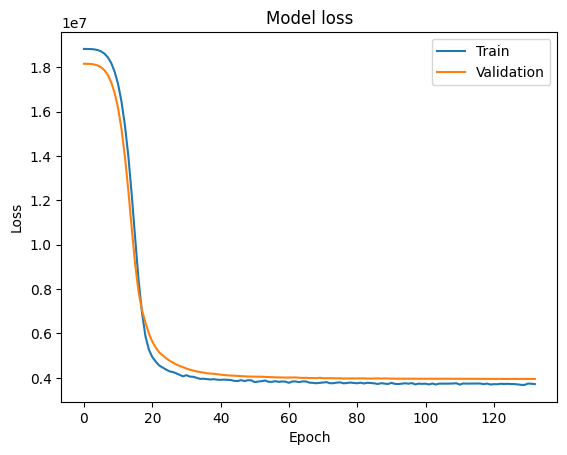

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from mlxtend.evaluate import feature_importance_permutation
imp_vals, imp_all = feature_importance_permutation(
    predict_method=model.predict,
    # Reshape to the correct 4D format (batch_size, height, width, channels)
    X=X_test.reshape(-1, 15, 6),
    y=y_test,
    metric='r2',
    num_rounds=10,
    seed=123,
)

InvalidArgumentError: Graph execution error:

Detected at node sequential/conv1d/Conv1D defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-102-dea60690fc47>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/mlxtend/evaluate/feature_importance.py", line 99, in feature_importance_permutation

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

input depth must be evenly divisible by filter depth: 15 vs 6
	 [[{{node sequential/conv1d/Conv1D}}]] [Op:__inference_predict_function_58704]

In [ ]:
print(imp_all)

[[ -14.0242145   -13.83974145  -13.65043588  -10.18825833  -13.7747498
   -12.56450086  -14.34942162  -12.73301211  -16.38252741  -11.05890465]
 [ -22.65525264  -25.01560863  -23.18480979  -24.78250723  -26.4637591
   -26.25130564  -24.91674061  -25.62184382  -26.18631024  -22.35982974]
 [ -43.08682494  -50.17661633  -44.56324297  -54.00702934  -54.06801276
   -51.0236334   -51.22481691  -52.05205985  -47.41072592  -39.94657936]
 [ -65.88335026  -66.92976068  -64.86010371  -61.03683978  -66.63078785
   -68.93252909  -66.45238122  -64.67554616  -67.43792876  -68.79462549]
 [ -81.22914907  -80.88477804  -77.97775953  -76.6116247   -84.42053743
   -78.82689126  -88.42351835  -74.93128143  -68.08005531  -81.41572392]
 [ -97.73014851  -93.7675595   -86.97540648  -81.42806603  -97.58351272
   -83.20015374  -93.24783606  -90.6856074   -87.49235961  -84.30540367]
 [-115.28207585  -98.47200204  -92.89386194 -100.79352259 -102.2113236
  -101.98698115  -97.95548417 -102.98837165 -111.56727601 -10

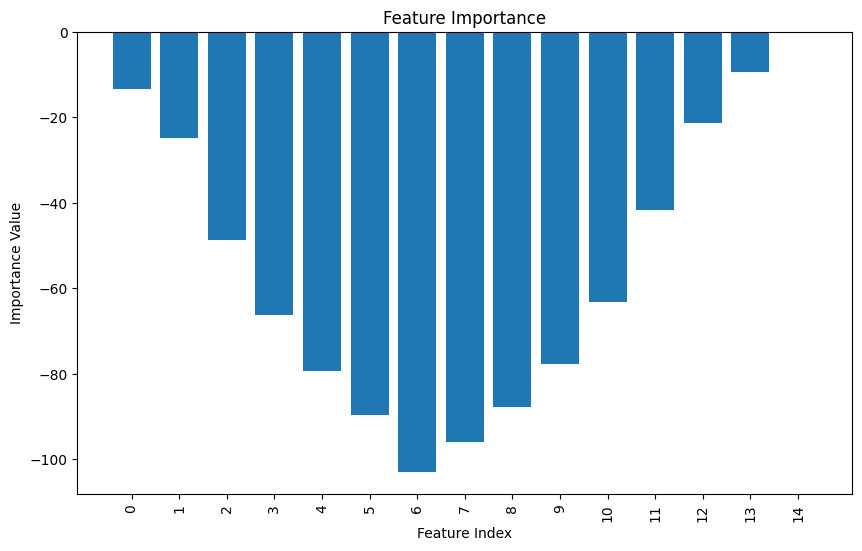

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(range(len(imp_vals)), imp_vals, align='center')
plt.xticks(range(len(imp_vals)), np.arange(len(imp_vals)), rotation=90)
plt.xlabel('Feature Index')
plt.ylabel('Importance Value')
plt.title('Feature Importance')
plt.show()


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import shap


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the data
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
explainer = shap.DeepExplainer(model, X_train[:1000].reshape(-1, 15, 6))  # Using a subset of training data for the explainer
shap_values = explainer.shap_values(X_test[:10].reshape(-1, 15, 6))  # Explain the first 10 test samples

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test[:10].reshape(-1, 15, 6))


AssertionError: The SHAP explanations do not sum up to the model's output! This is either because of a rounding error or because an operator in your computation graph was not fully supported. If the sum difference of %f is significant compared to the scale of your model outputs, please post as a github issue, with a reproducible example so we can debug it. Used framework: tensorflow - Max. diff: 3.0 - Tolerance: 0.01

In [ ]:
pip install tf-explain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tf_explain.core.integrated_gradients import IntegratedGradients

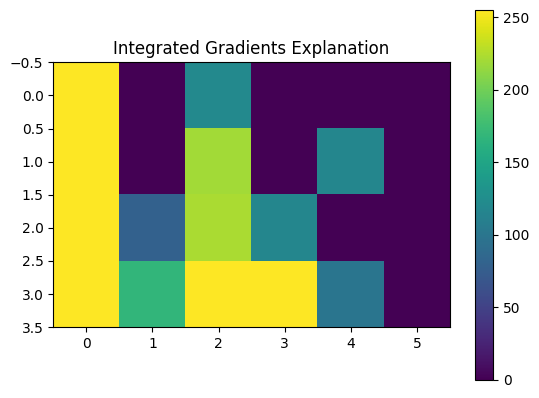

In [ ]:
from tf_explain.core.integrated_gradients import IntegratedGradients
import matplotlib.pyplot as plt

# Use tf-explain for model explainability with Integrated Gradients
explainer = IntegratedGradients()

# Assuming X_test is flattened, reshape it to include the channel dimension
X_test_reshaped = X_test[:10].reshape(X_test[:10].shape[0], 15, 6, 1)  # Assuming original shape was (15, 6)

# Prepare data as a tuple with inputs and dummy labels (assuming y_test is available)
data = (X_test_reshaped, y_test[:10])

# Calculate the explanations
explanations = explainer.explain(data, model, class_index=None)

# Visualize the explanations for the first sample
plt.imshow(explanations[8].reshape(4, -1), cmap='viridis')
plt.colorbar()
plt.title("Integrated Gradients Explanation")
plt.show()

In [ ]:
explanations

array([[  2,   0,   0, ...,   0,   0,   0],
       [ 92,  18,  78, ...,   0,   0,   0],
       [255,   0,  70, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
# Use tf-explain for model explainability with Integrated Gradients
explainer = IntegratedGradients()

# Prepare data as a tuple with inputs and dummy labels
data = (X_test[:10], y_test[:10])

# Calculate the explanations
explanations = explainer.explain(data, model, class_index=None)

# Visualize the explanations for the first sample
plt.imshow(explanations[0], cmap='viridis')
plt.colorbar()
plt.title("Integrated Gradients Explanation")
plt.show()

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/tf_explain/utils/image.py", line 40, in transform_to_normalized_grayscale  *
        normalized_tensor = tf.cast(

    ValueError: 'image' (shape (10, 15)) must be at least three-dimensional.


In [ ]:

pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=bc9dfce45ae17c4e09163c862716491504bdb1423fe0fe9554df16ba3fc232c4
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.base import BaseEstimator, ClassifierMixin

# Wrapper class to use Keras models with scikit-learn
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        return self

    def predict(self, X_test):
        return (self.model.predict(X_test) > 0.5).astype(int)

    def predict_proba(self, X_test):
        return self.model.predict(X_test)

# Wrap the Keras model
wrapped_model = KerasClassifier(model)

# Compute permutation importance
perm = PermutationImportance(wrapped_model, scoring='accuracy', n_iter=10, random_state=0)
perm.fit(X_train_flat, target_col)

# Display the results
eli5.show_weights(perm, feature_names=[f"Feature {i}" for i in range(X_train.shape[1] * X_train.shape[2])])


InvalidArgumentError: Graph execution error:

Detected at node sequential/conv1d/Conv1D defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-129-ef2d56bf2b6e>", line 25, in <cell line: 25>

  File "/usr/local/lib/python3.10/dist-packages/eli5/sklearn/permutation_importance.py", line 204, in fit

  File "/usr/local/lib/python3.10/dist-packages/eli5/sklearn/permutation_importance.py", line 232, in _non_cv_scores_importances

  File "/usr/local/lib/python3.10/dist-packages/eli5/sklearn/permutation_importance.py", line 236, in _get_score_importances

  File "/usr/local/lib/python3.10/dist-packages/eli5/permutation_importance.py", line 86, in get_score_importances

  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__

  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score

  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call

  File "<ipython-input-129-ef2d56bf2b6e>", line 15, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

convolution input must be 4-dimensional: [1,32,90]
	 [[{{node sequential/conv1d/Conv1D}}]] [Op:__inference_predict_function_59364]

In [ ]:
pip install quantus


In [ ]:
import quantus



In [ ]:
# Use Quantus for model explainability
explainable_model = quantus.models.ExplainableModel(model, input_shape=(sequence_length, n_features))
from quantus import IntegratedGradients

# Choose an explanation method
method = IntegratedGradients(model)

# Calculate the explanations for the first 10 test samples
explanations = method(X_test[:10])

# Visualize the explanations
quantus.plot(explanations, X_test[:10])

In [ ]:
# Ensure X_test and y_test are 2D
X_train = X_train.reshape(X_train.shape[0], -1) if X_test.ndim == 3 else X_train
#y_train = y_train.reshape(y_train.shape[0], -1) if y_test.ndim == 3 else y_train

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming X_train and y_train are pandas DataFrames
perm_importance = permutation_importance(model, X_train, y_train)

importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({X_train.columns[indices[f]]}): {importances[indices[f]]}")


In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you have trained your model and have X_train and y_train ready
# model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train, y_train)

# Get importances and their indices
importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]  # Indices in descending order

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({X_train.columns[indices[f]]}): {importances[indices[f]]}")


In [ ]:
# 1D CNN + LSTM Hybrid Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, GRU, Bidirectional, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam , RMSprop

In [ ]:
# Define the model
model_hybrid = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, n_features), kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(pool_size=2),

    LSTM(32, activation='relu', return_sequences=True),

    LSTM(16, activation='relu'),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(1)
])


In [ ]:
# Compile the model with Adam optimizer and MSE loss
optimizer = Adam(learning_rate=1e-4)
model_hybrid.compile(optimizer=optimizer, loss='mae')

In [ ]:
# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [ ]:
model_hybrid.summary()

In [ ]:
# Train the model
history_hybrid = model_hybrid.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1,callbacks=[early_stopping, reduce_lr])

In [ ]:
# Evaluate the model
test_loss_hybrid = model_hybrid.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_hybrid}")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions
predictions_hybrid = model_hybrid.predict(X_test)

In [ ]:
y_pred_cnn = predictions.flatten()
y_pred_hybrid = predictions_hybrid.flatten()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

In [ ]:
print(type(y))
print(type(predictions))
print(type(predictions_hybrid))

In [ ]:
true_val = y.values

In [ ]:
print(type(true_val))

In [ ]:
print(len(predictions))

In [ ]:
print(len(predictions_hybrid))

In [ ]:
print(type(y_test))

In [ ]:
print(len(y_test))

In [ ]:
def plot_time_series(y_true, y_pred_cnn, y_pred_hybrid):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true, label='Actual', color='blue')
    plt.plot(y_pred_cnn, label='1D CNN Predictions', linestyle='--', color='green')
    plt.plot(y_pred_hybrid, label='1D CNN + LSTM Predictions', linestyle='--', color='red')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
y_true = y_test
y_pred_cnn = predictions
y_pred_hybrid = predictions_hybrid

In [ ]:
plot_time_series(y_true, y_pred_cnn, y_pred_hybrid)

In [ ]:
def plot_error_metrics(y_true, y_pred_cnn, y_pred_hybrid):
    # Calculate MAE and MSE
    mae_cnn = mean_absolute_error(y_true, y_pred_cnn)
    mae_hybrid = mean_absolute_error(y_true, y_pred_hybrid)
    mse_cnn = mean_squared_error(y_true, y_pred_cnn)
    mse_hybrid = mean_squared_error(y_true, y_pred_hybrid)

    # Calculate improvement percentage for MAE and MSE
    mae_improvement = ((mae_cnn - mae_hybrid) / mae_cnn) * 100
    mse_improvement = ((mse_cnn - mse_hybrid) / mse_cnn) * 100

    # Normalize values
    mae_cnn_norm = mae_cnn / np.mean(y_true)
    mae_hybrid_norm = mae_hybrid / np.mean(y_true)
    mse_cnn_norm = mse_cnn / np.mean(y_true ** 2)
    mse_hybrid_norm = mse_hybrid / np.mean(y_true ** 2)

    plt.figure(figsize=(10, 8))

    bar_width = 0.2
    index = np.arange(2)

    # Plot normalized MAE and MSE comparison
    plt.bar(index - bar_width/2, [mae_cnn_norm, mse_cnn_norm], bar_width, label='1D CNN', color='green')
    plt.bar(index + bar_width/2, [mae_hybrid_norm, mse_hybrid_norm], bar_width, label='1D CNN + LSTM', color='red')

    plt.xlabel('Metrics')
    plt.ylabel('Normalized Score')
    plt.title('Normalized Error Metrics Comparison between 1D CNN and Hybrid Model')
    plt.xticks(index, ['MAE', 'MSE'])
    plt.legend()
    plt.grid(True)

    # Add improvement percentage annotations
    for i, metric in enumerate(['MAE', 'MSE']):
        plt.text(index[i] + bar_width/2, mae_hybrid_norm if i == 0 else mse_hybrid_norm,
                 f'{mae_improvement:.2f}%' if i == 0 else f'{mse_improvement:.2f}%',
                 ha='center', va='bottom', fontsize=10, color='black')

    plt.show()


In [ ]:
plot_error_metrics(y_true, y_pred_cnn, y_pred_hybrid)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_true, y_pred_cnn)

print(f"MAPE: {mape:.2f}%")


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred_hybrid)

print(f"MAPE: {mape:.2f}%")


In [ ]:
# Calculate metrics for 1D CNN
mae_cnn = mean_absolute_error(y_true, y_pred_cnn)
mse_cnn = mean_squared_error(y_true, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_true, y_pred_cnn)


In [ ]:
# Calculate metrics for Hybrid Model
mae_hybrid = mean_absolute_error(y_true, y_pred_hybrid)
mse_hybrid = mean_squared_error(y_true, y_pred_hybrid)
rmse_hybrid = np.sqrt(mse_hybrid)
r2_hybrid = r2_score(y_true, y_pred_hybrid)

In [ ]:
# Print the metrics
print("1D CNN Model Metrics:")
print(f"MAE: {mae_cnn}")
print(f"MSE: {mse_cnn}")
print(f"RMSE: {rmse_cnn}")
print(f"R-squared: {r2_cnn}")

print("\nHybrid Model Metrics:")
print(f"MAE: {mae_hybrid}")
print(f"MSE: {mse_hybrid}")
print(f"RMSE: {rmse_hybrid}")
print(f"R-squared: {r2_hybrid}")


In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
import shap

# Initialize the SHAP GradientExplainer
explainer = shap.DeepExplainer(model, X_test)
shap_values = explainer.shap_values(X_test[:100])

# Visualize the SHAP values for the first instance in the dataset
shap.summary_plot(shap_values, X_test)


In [ ]:
# Assume cnn_model is your trained 1D CNN model and X is your time series data
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP values for the first instance in the dataset
shap.summary_plot(shap_values, X_train)

In [ ]:
 Get the attention weights from the model
attention_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output[1])
attention_weights = attention_model.predict(X_train)

# Visualize the attention weights for the first instance in the dataset
plt.matshow(attention_weights[0].reshape(1, -1), cmap='viridis')
plt.colorbar()
plt.title('Attention Weights')
plt.show()